<a href="https://colab.research.google.com/github/analemasolar/clasificadorpiezas/blob/main/Clasificador_piezas_metalicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Definir ruta de los datos {defectuosa, buena}

In [ ]:
!pip freeze > requirements.txt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
dir_train = '/content/drive/MyDrive/dataset'

In [15]:
os.listdir(dir_train)

['defectuosa', 'buena']

# Obtener cada imagen dentro de cada carpeta

In [16]:
imagen_extension = ['jpeg']

In [17]:
import tensorflow as tf
import cv2
import os
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

In [19]:
from tensorflow import python
print(tf.__version__)
print(cv2.__version__)
!python --version

2.8.2
4.6.0
Python 3.7.13


In [20]:
for imagen_clase in os.listdir(dir_train):
  for imagen in os.listdir(os.path.join(dir_train, imagen_clase)):
    imagen_path = os.path.join(dir_train, imagen_clase, imagen)
    try:
      img = cv2.imread(imagen_path)
      tip = imghdr.what(imagen_path)
      if tip not in imagen_extension:
        print('La imagen no existe en la lista {}'.format(imagen_path))
        os.remove(imagen_path)
    except Exception as e:
      print('Problema con la imagen {}'.format(imagen_path))


In [21]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/dataset')

Found 7348 files belonging to 2 classes.


In [22]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
data_iterator = data.as_numpy_iterator()

Se obtiene un nuevo batch size del iterador de TF

In [24]:
batch = data_iterator.next()

# TF define el batch, representadas por numpy
- Clase 0: Pieza buena 
- Clase 1: Pieza defectuosa 
Ej: batch[0]

In [25]:
batch[0].shape

(32, 256, 256, 3)

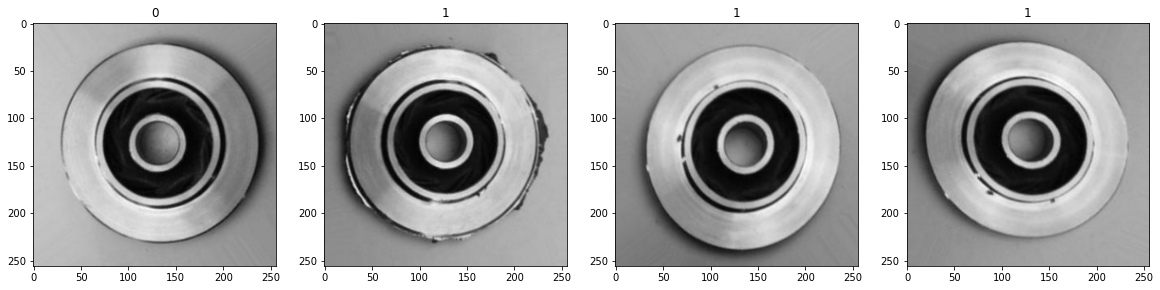

In [26]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# Preprocesamiento de datos
Escalando la data

In [27]:
data = data.map(lambda x,y: (x/255,y))

In [28]:
iterador_escalado = data.as_numpy_iterator()

In [29]:
batch = iterador_escalado.next()

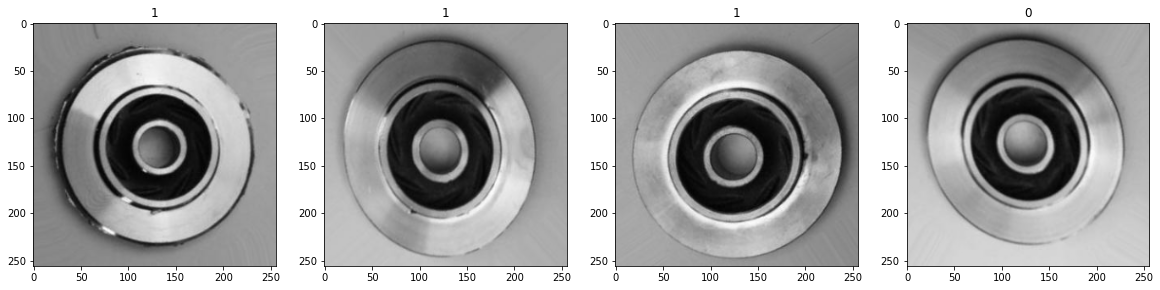

In [30]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

# Dividiendo la data
- train_size -> 70%
- validation_size -> 20%
- test_size -> 10%

In [31]:
len(data)

230

In [32]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [33]:
test_size + train_size + val_size

231

In [34]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [35]:
len(train)

161

# Deep Learning Model
- Construir el modelo

In [40]:
model = Sequential()

In [41]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

## Resumen del modelo

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)      

# Entrenamiento

In [44]:
logsdir = '/content/drive/MyDrive/DATOS_PIEZAS/data/logs'

In [45]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logsdir)

In [46]:
from keras import callbacks
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
161/161 [==============================] - 38s 158ms/step - loss: 0.5455 - accuracy: 0.7145 - val_loss: 0.3808 - val_accuracy: 0.8298
Epoch 2/10
161/161 [==============================] - 34s 210ms/step - loss: 0.3667 - accuracy: 0.8300 - val_loss: 0.3126 - val_accuracy: 0.8617
Epoch 3/10
161/161 [==============================] - 34s 206ms/step - loss: 0.2337 - accuracy: 0.9035 - val_loss: 0.2647 - val_accuracy: 0.8797
Epoch 4/10
161/161 [==============================] - 33s 206ms/step - loss: 0.1384 - accuracy: 0.9488 - val_loss: 0.1626 - val_accuracy: 0.9315
Epoch 5/10
161/161 [==============================] - 35s 214ms/step - loss: 0.0837 - accuracy: 0.9713 - val_loss: 0.0859 - val_accuracy: 0.9688
Epoch 6/10
161/161 [==============================] - 34s 206ms/step - loss: 0.0979 - accuracy: 0.9653 - val_loss: 0.1377 - val_accuracy: 0.9428
Epoch 7/10
161/161 [==============================] - 34s 207ms/step - loss: 0.0579 - accuracy: 0.9835 - val_loss: 0.0440 - val_ac

# Plot desempeño

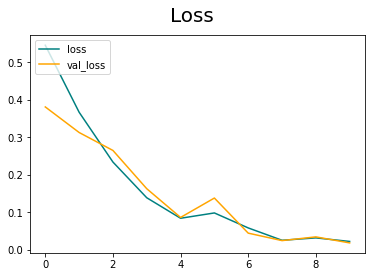

In [47]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

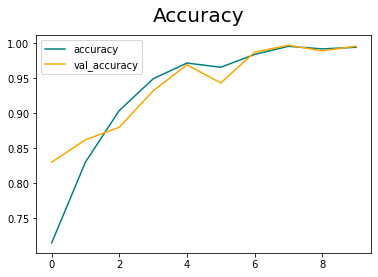

In [48]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

# Evaluar el desempeño del modelo
- Predecir desde los datos de prueba.

In [49]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [50]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [51]:
len(test)

22

In [52]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

In [53]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9974489808082581, Recall:0.984886646270752, Accuracy:0.9900568127632141


# Test
- Elegir imagenes para hacer prueba

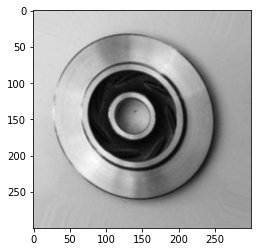

In [ ]:
imagen_buena_prueba = cv2.imread('/content/drive/MyDrive/DATOS_PIEZAS/data/buena/buena_78.jpeg')
plt.imshow(cv2.cvtColor(imagen_buena_prueba, cv2.COLOR_BGR2RGB))
plt.show()

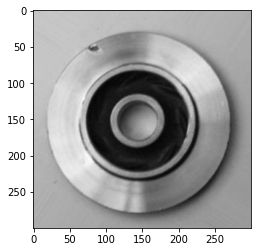

In [ ]:
imagen_defectuosa_prueba = cv2.imread('/content/drive/MyDrive/DATOS_PIEZAS/data/defectuosa/defectuosa_256.jpeg')
plt.imshow(cv2.cvtColor(imagen_defectuosa_prueba, cv2.COLOR_BGR2RGB))
plt.show()

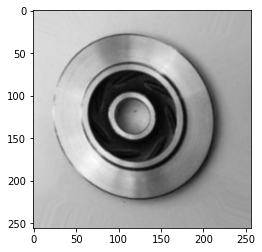

In [ ]:
resize_bue = tf.image.resize(imagen_buena_prueba, (256,256))
plt.imshow(resize_bue.numpy().astype(int))
plt.show()

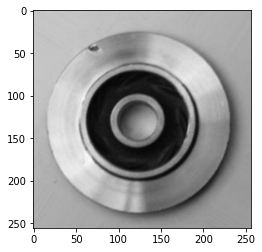

In [ ]:
resize_def = tf.image.resize(imagen_defectuosa_prueba, (256,256))
plt.imshow(resize_def.numpy().astype(int))
plt.show()

# Hacer la predicción para las imagenes de prueba

In [ ]:
resize_bue.shape

TensorShape([256, 256, 3])

In [ ]:
yhat = model.predict(np.expand_dims(resize_def/255, 0))

In [ ]:
yhat

array([[0.63233644]], dtype=float32)

- Valor más cercano a 0 es pieza **buena** ej: array([[**0.01620584]**], dtype=float32)
- Valor más cercano a 1 es pieza **defectuosa**


In [ ]:
if yhat > 0.5:
  print(f'Predicción de pieza es Defectuosa')
else:
  print(f'Predicción de pieza es Buena')

Predicción de pieza es Defectuosa


# Guardar el modelo

In [ ]:
from keras.models import load_model

In [ ]:
dir_save = '/content/drive/MyDrive/DATOS_PIEZAS/models'

In [ ]:
model.save(os.path.join(dir_save, 'clasificador_metal.h5'))

# Recargar el modelo exportado

In [ ]:
new_model = load_model(os.path.join(dir_save, 'clasificador_metal.h5'))

In [ ]:
new_model

In [ ]:
yhat_new = new_model.predict(np.expand_dims(resize_bue/255, 0))

In [ ]:
if yhat_new > 0.5:
  print(f'Predicción de pieza es Defectuosa')
else:
  print(f'Predicción de pieza es Buena')

# GIT Repository